In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
ElonMusk=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\11.Text Mining\Elon_musk.csv',encoding='Latin-1')
ElonMusk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
ElonMusk.drop(['Unnamed: 0'],inplace=True,axis=1)
ElonMusk.rename({'Text':'Tweets'},axis=1,inplace=True)
ElonMusk.head(3)

,Tweets
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!


###### Data Understanding

In [5]:
ElonMusk.shape

(1999, 1)

In [6]:
ElonMusk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [7]:
ElonMusk.isnull().sum()

Tweets    0
dtype: int64

In [8]:
#Number of Words
ElonMusk['word_count']=ElonMusk['Tweets'].apply(lambda x:len(str(x).split(" ")))
ElonMusk[['Tweets','word_count']].head()

,Tweets,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [9]:
#Number of characters
ElonMusk['char_count']=ElonMusk['Tweets'].str.len() ## this also includes spaces
ElonMusk[['Tweets','char_count']].head()

,Tweets,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [10]:
#Function to calculate average word length in a text
def average_word_length(text):
    words=text.split()
    total_word_length=sum(len(word) for word in words)
    num_words=len(words)
    if num_words==0:
        return 0  # To handle cases where there are no words
    return total_word_length/num_words

#Apply the function to the 'Tweets' column
ElonMusk['Average_Word_Length']=ElonMusk['Tweets'].apply(average_word_length)
ElonMusk[['Tweets','Average_Word_Length']].head()

,Tweets,Average_Word_Length
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [11]:
#Calculate and print the overall average word length
overall_average=np.mean(ElonMusk['Average_Word_Length'])
print("Overall Average Word Length:",overall_average)

Overall Average Word Length: 7.508894448930755


The average_word_length function takes a text as input, splits it into words, calculates the total length of all words, and then divides it by the number of words to get the average word length for that text. This function is applied to each tweet in the 'Tweets' column, and the result is stored in the 'Average_Word_Length' column.

In [12]:
import nltk
from nltk.corpus import stopwords

#Downloading stopwords
nltk.download('stopwords')

#Get the set of stopwords
stop_words=set(stopwords.words('english'))

#Function to count stopwords in a text
def count_stopwords(text):
    words=text.split()
    num_stopwords=sum(1 for word in words if word in stop_words)
    return num_stopwords

#Apply the function to the 'Tweets' column
ElonMusk['Num_Stopwords']= ElonMusk['Tweets'].apply(count_stopwords)
ElonMusk[['Tweets','Num_Stopwords']].head()

[nltk_data] Downloading package stopwords to C:\Users\Linta
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Tweets,Num_Stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [13]:
#Calculate and print the overall number of stopwords
overall_num_stopwords=ElonMusk['Num_Stopwords'].sum()
print("Overall Number of Stopwords:",overall_num_stopwords)

Overall Number of Stopwords: 5189


The 'count_stopwords' function takes a text as input, splits it into words, and then counts the number of words that are present in the set of stopwords. This count is then stored in the 'Num_Stopwords' column for each tweet.The overall number of stopwords for the entire dataset is calculated by summing up the 'Num_Stopwords' column values, and the result is printed to the console.

In [14]:
import string

#Function to count special characters in a text
def count_special_characters(text):
    special_chars=set(string.punctuation)
    num_special_chars=sum(1 for char in text if char in special_chars)
    return num_special_chars

#Apply the function to the 'Tweets' column
ElonMusk['Num_Special_Characters']=ElonMusk['Tweets'].apply(count_special_characters)
ElonMusk[['Tweets','Num_Special_Characters']].head()

,Tweets,Num_Special_Characters
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,6
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,4


In [15]:
# Calculate and print the overall number of special characters
overall_num_special_chars=ElonMusk['Num_Special_Characters'].sum()
print("Overall Number of Special Characters:", overall_num_special_chars)

Overall Number of Special Characters: 10670


The 'count_special_characters' function takes a text as input and counts the number of characters that belong to the set of special characters defined in the string.punctuation module. This count is then stored in the 'Num_Special_Characters' column for each tweet.The overall number of special characters for the entire dataset is calculated by summing up the 'Num_Special_Characters' column values, and the result is printed to the console.

In [16]:
#Function to count numerics in a text
def count_numerics(text):
    num_numerics=sum(1 for char in text if char.isnumeric())
    return num_numerics

#Apply the function to the 'Tweets' column
ElonMusk['Num_Numerics']=ElonMusk['Tweets'].apply(count_numerics)
ElonMusk[['Tweets','Num_Numerics']].head()

,Tweets,Num_Numerics
0,@kunalb11 Im an alien,2
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,2
4,@teslacn Congratulations Tesla China for amazi...,0


In [17]:
#Calculate and print the overall number of numerics
overall_num_numerics=ElonMusk['Num_Numerics'].sum()
print("Overall Number of Numerics:", overall_num_numerics)

Overall Number of Numerics: 4294


The count_numerics function takes a text as input and counts the number of characters that are numeric using the char.isnumeric() method. This count is then stored in the 'Num_Numerics' column for each tweet.The overall number of numerics for the entire dataset is calculated by summing up the 'Num_Numerics' column values, and the result is printed to the console.

In [18]:
#Function to count uppercase words in a text
def count_uppercase_words(text):
    words=text.split()
    num_uppercase_words=sum(1 for word in words if word.isupper())
    return num_uppercase_words

#Apply the function to the 'Tweets' column
ElonMusk['Num_Uppercase_Words']=ElonMusk['Tweets'].apply(count_uppercase_words)
ElonMusk[['Tweets','Num_Uppercase_Words']].head()

,Tweets,Num_Uppercase_Words
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [19]:
#Calculate and print the overall number of uppercase words
overall_num_uppercase_words=ElonMusk['Num_Uppercase_Words'].sum()
print("Overall Number of Uppercase Words:", overall_num_uppercase_words)

Overall Number of Uppercase Words: 809


The count_uppercase_words function takes a text as input, splits it into words, and counts the number of words that are completely in uppercase using the word.isupper() method. This count is then stored in the 'Num_Uppercase_Words' column for each tweet.The overall number of uppercase words for the entire dataset is calculated by summing up the 'Num_Uppercase_Words' column values, and the result is printed to the console.

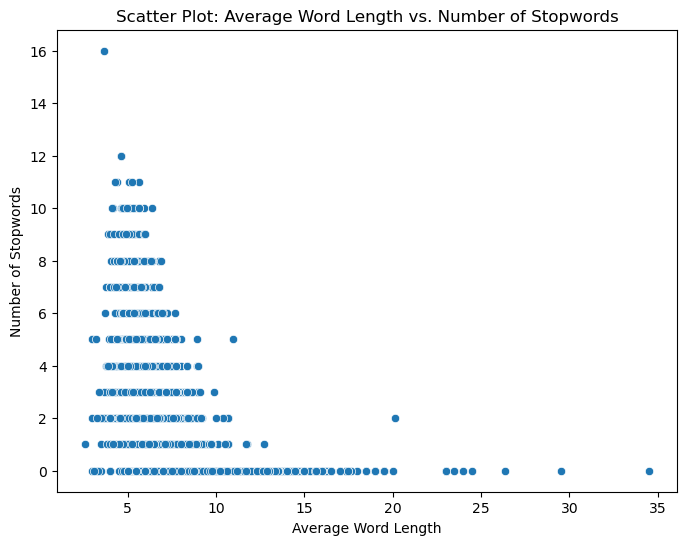

In [20]:
#Create a scatter plot of average word length vs. number of stopwords
plt.figure(figsize=(8,6))
sns.scatterplot(x='Average_Word_Length',y='Num_Stopwords',data=ElonMusk)
plt.xlabel('Average Word Length')
plt.ylabel('Number of Stopwords')
plt.title('Scatter Plot: Average Word Length vs. Number of Stopwords')
plt.show()

In [21]:
ElonMusk.drop(['Num_Numerics','Num_Special_Characters','Num_Stopwords','Average_Word_Length','char_count','word_count','Num_Uppercase_Words'],axis=1,inplace=True)

In [22]:
#Number of rare words
RareWords=pd.Series(' '.join(ElonMusk['Tweets']).split()).value_counts()[-10:]
RareWords

N3                         1
lab                        1
(N1                        1
detection                  1
Lab                        1
https://t.co/K77wXQ11yt    1
dicey                      1
accurate,                  1
thinks                     1
28                         1
dtype: int64

In [23]:
#Percentage of links attached in the tweets
ElonMusk.Tweets.str.contains('https://').value_counts()/len(ElonMusk)

False    0.678339
True     0.321661
Name: Tweets, dtype: float64

It shows the percentage of tweets containing links (True) and the percentage of tweets not containing links (False) in the 'Tweets' column of the ElonMusk DataFrame.

The output indicates that approximately 67.83% of the tweets in the 'Tweets' column do not contain links (False), and approximately 32.17% of the tweets contain links (True).

In [24]:
#Percentage of user tags in the tweets
ElonMusk.Tweets.str.contains('@').value_counts()/len(ElonMusk)

True     0.83942
False    0.16058
Name: Tweets, dtype: float64

It shows the percentage of tweets containing user tags (True) and the percentage of tweets not containing user tags (False) in the 'Tweets' column of the ElonMusk DataFrame.

The output indicates that approximately 83.94% of the tweets in the 'Tweets' column contain user tags (True), and approximately 16.06% of the tweets do not contain user tags (False).

In [25]:
#Total number of Tweets in the available DataFrame
print('Total tweets this period:',len(ElonMusk.index),'\n')

Total tweets this period: 1999 



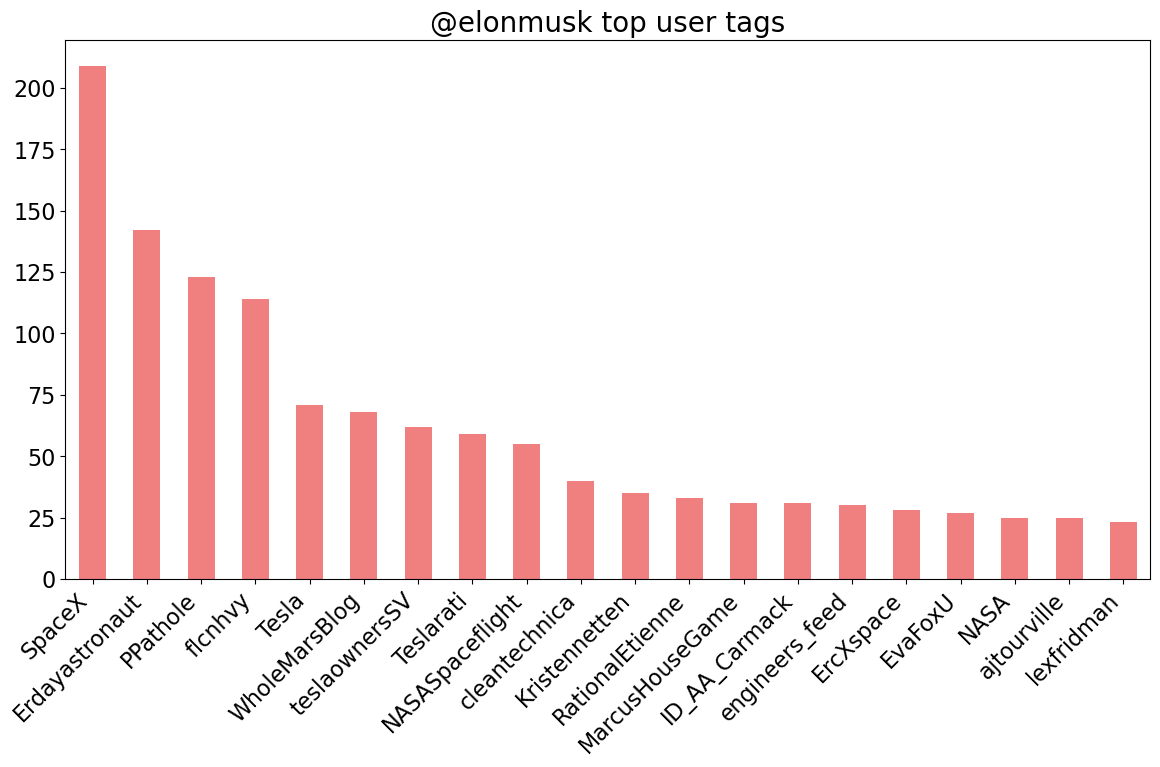

In [26]:
#Data Visualization
import itertools

c = list(
itertools.chain(
    *ElonMusk.Tweets.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7),fontsize=16,color='lightcoral'
)
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

1. `import itertools`: This imports the `itertools` module, which provides various tools for working with iterators and iterable objects.

2. `c = list(itertools.chain(*ElonMusk.Tweets.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") if '@' in handle.replace(":", "")]).tolist()))`: 

    - `tweets.Tweets.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") if '@' in handle.replace(":", "")]).tolist()`: This part processes each tweet in the 'Tweets' column. It uses a lambda function to split the tweet text into words, and then it extracts user tags (handles) by removing any colons and checking for '@'. It generates a list of user tags for each tweet.
    
    - `itertools.chain(*...)`: This flattens the list of lists generated above into a single list of user tags. The `chain` function takes multiple iterable arguments and produces elements from each of them one by one.

    - `c = list(...)`: This converts the flattened list of user tags into a regular Python list and assigns it to the variable `c`.

3. `pd.Series(c).value_counts().head(20).plot.bar(...)`: This part creates a pandas Series from the list of user tags (`c`), calculates the count of each unique user tag using `value_counts()`, selects the top 20 most common user tags using `head(20)`, and then plots a bar plot of these counts using Matplotlib.

4. `plt.gca().set_title('@elonmusk top user tags', fontsize=20)`: This sets the title of the plot to "@elonmusk top user tags" with a font size of 20.

5. `plt.gca().set_xticklabels(...)`: This sets the labels of the x-axis ticks. The labels are rotated 45 degrees, aligned to the right, and set with a font size of 16.

6. `pass`: This is a placeholder statement that does nothing. It's often used in places where syntax requires a statement, but you don't want to execute any code.

This is to analyze the most common user tags (handles) in the 'Tweets' column of the `ElonMusk` DataFrame, and then create and customize a bar plot using Matplotlib to visualize this information.

###### Data Pre-processing

In [27]:
#!pip install textblob

In [28]:
from textblob import TextBlob
ElonMusk['Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                               @kunalb11 Im an alien
1    @ID_AA_Carmack May tracing on Cyberpunk with H...
2                   @joerogan @Notify Great interview!
3                       @gtera27 One is underestimated
4    @teslacn Congratulations Cela China for amazin...
Name: Tweets, dtype: object

N-grams:

N-grams are contiguous sequences of N items (words, characters, or other linguistic units) extracted from a given text. N-grams are widely used in natural language processing (NLP) and text analysis for various purposes, including language modeling, feature extraction, and information retrieval. The "N" in N-grams represents the number of items in each sequence.
For example, in the sentence "The quick brown fox jumps," some common N-grams are:
+ 1-grams (Unigrams): ["The", "quick", "brown", "fox", "jumps"]
+ 2-grams (Bigrams): ["The quick", "quick brown", "brown fox", "fox jumps"]
+ 3-grams (Trigrams): ["The quick brown", "quick brown fox", "brown fox jumps"]
+ 4-grams (Fourgrams or Quadgrams): ["The quick brown fox", "quick brown fox jumps"]

Uses of N-grams:
+ Language Modeling: N-grams are used to model the likelihood of a word based on the previous N-1 words. This is the basis for various language models, such as n-gram models and more advanced models like LSTM and Transformer.
+ Text Generation: N-grams can be used to generate new text by predicting the next word or character based on the previous N-1 words or characters. This is used in chatbots, text completion, and creative writing applications.
+ Feature Extraction: In text classification and sentiment analysis, N-grams are used to extract features from the text. N-gram frequencies can be used as input features for machine learning models.
+ Search Engines: N-grams are used in search engines to improve search results by finding matches based on partial words or phrases.
+ Machine Translation: N-grams help in statistical machine translation by analyzing sequences of words and their likely translations.
+ Spelling and Grammar Correction: N-grams are used in spelling and grammar correction systems to identify incorrect word sequences and suggest corrections.
+ Text Similarity and Clustering: N-grams can be used to measure text similarity and cluster documents based on shared word sequences.
+ Speech Recognition: N-grams can be used in speech recognition systems to improve accuracy by predicting likely next words based on previous words.
+ Named Entity Recognition: N-grams can assist in identifying named entities (such as people, places, organizations) in text.
+ Sentiment Analysis: N-grams can be used as features to analyze sentiment by identifying common word sequences associated with positive or negative sentiment.

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Linta
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
TextBlob(ElonMusk['Tweets'][3]).ngrams(1)

[WordList(['gtera27']),
 WordList(['Doge']),
 WordList(['is']),
 WordList(['underestimated'])]

In [31]:
TextBlob(ElonMusk['Tweets'][2]).ngrams(2)

[WordList(['joerogan', 'Spotify']),
 WordList(['Spotify', 'Great']),
 WordList(['Great', 'interview'])]

In [32]:
TextBlob(ElonMusk['Tweets'][4]).ngrams(3)

[WordList(['teslacn', 'Congratulations', 'Tesla']),
 WordList(['Congratulations', 'Tesla', 'China']),
 WordList(['Tesla', 'China', 'for']),
 WordList(['China', 'for', 'amazing']),
 WordList(['for', 'amazing', 'execution']),
 WordList(['amazing', 'execution', 'last']),
 WordList(['execution', 'last', 'year']),
 WordList(['last', 'year', 'Now']),
 WordList(['year', 'Now', 'on']),
 WordList(['Now', 'on', 'to']),
 WordList(['on', 'to', 'the']),
 WordList(['to', 'the', 'next']),
 WordList(['the', 'next', 'for']),
 WordList(['next', 'for', 'even']),
 WordList(['for', 'even', 'more'])]

In [33]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

nltk.download('wordnet')
nltk.download('omw-1.4')

#Initialize lemmatizer and TweetTokenizer
lemmatizer=WordNetLemmatizer()
tokenizer=TweetTokenizer()

#Function for basic text pre-processing
def preprocess_text(text):
    text=re.sub(r'http\S+', '', text)  # Removing URLs
    text=re.sub(r'\W', ' ', text)  # Removing non-word characters
    text=re.sub(r'\s+', ' ', text)  # Removing extra spaces
    text=' '.join([word for word in tokenizer.tokenize(text) if word not in stop_words and not word.startswith('@')])  # Removing stopwords and user tags
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])  # Lemmatization
    return text

#Apply the function to the 'Tweets' column
ElonMusk['Preprocessed_Tweets']=ElonMusk['Tweets'].apply(preprocess_text)
ElonMusk[['Tweets','Preprocessed_Tweets']].head()

[nltk_data] Downloading package wordnet to C:\Users\Linta
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Linta
[nltk_data]     Stephen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Tweets,Preprocessed_Tweets
0,@kunalb11 Im an alien,kunalb 11 I alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ID_AA_Carmack Ray tracing Cyberpunk HDR next l...
2,@joerogan @Spotify Great interview!,joerogan Spotify Great interview
3,@gtera27 Doge is underestimated,gtera 27 Doge underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China amazing ex...


+ Lemmatization aims to bring words to their base form while taking into account their grammatical properties and context, resulting in more accurate results than simple stemming.
+ The TweetTokenizer is used to tokenize tweets while also handling Twitter username handles (user tags) as separate tokens.
+ The ' '.join([word for word in tokenizer.tokenize(text) if word not in stop_words and not word.startswith('@')]) part of the code removes stopwords and user tags (Twitter username handles) from the tokenized text.

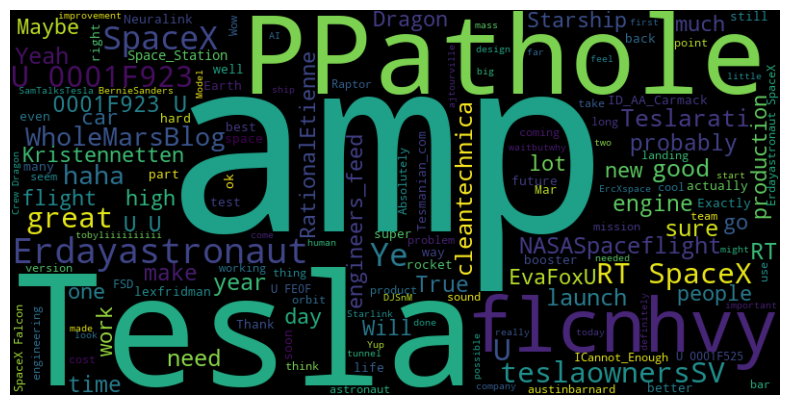

In [34]:
from wordcloud import WordCloud

#Combining all preprocessed tweets into a single string
all_preprocessed_tweets=' '.join(ElonMusk['Preprocessed_Tweets'])

#Creating a WordCloud object
wordcloud=WordCloud(width=800,height=400,background_color='black',max_words=150).generate(all_preprocessed_tweets)

# Plot the WordCloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

We first combine all the preprocessed tweets into a single string. Then we create a WordCloud object with various parameters such as width, height, background_color, and max_words. Finally, we use matplotlib to plot the word cloud and display it without the axes.

In [35]:
all_preprocessed_tweets

'kunalb 11 I alien ID_AA_Carmack Ray tracing Cyberpunk HDR next level Have tried joerogan Spotify Great interview gtera 27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself OwenSparks _ flcnhvy anonyx 10 Haha thanks flcnhvy anonyx 10 Indeed Tweets definitely represent real world time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest  geoffkeighley UnrealEngine It getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issue sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U 0001F923 U 0001F923 This true power haha freewalletorg Any crypto wallet give private key avoided cost freewalletorg Your app suck RT SpaceX NASA selected Falcon Heavy launch first two element lunar Gateway together one mission ajtourville Yes BLKMDL 3 RationalEtienne Adamklotz _ Once pre

###### Feature Extraction

1. Bag of Words (BoW) without N-grams:

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

#Initialize CountVectorizer
vectorizer=CountVectorizer()

#Apply BoW on preprocessed text
X_bow=vectorizer.fit_transform(ElonMusk['Preprocessed_Tweets'])

#Convert to DataFrame for better understanding
bow_df=pd.DataFrame(X_bow.toarray(),columns=vectorizer.get_feature_names_out())

In [37]:
bow_df

,00,000,0001f1e6,0001f1e7,0001f1e8,0001f1e9,0001f1ea,0001f1f4,0001f1f8,0001f1fa,...,zikryzamir,zip,zog_fot_pik,zon,zone,zshauladventure,zubinanary,zwiebelbach,zzcool,ðogecoin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. CountVectorizer with N-grams (Bigram and Trigram):

In [38]:
#Initialize CountVectorizer with Bigram and Trigram
vectorizer=CountVectorizer(ngram_range=(2, 3))

#Apply CountVectorizer on preprocessed text
X_ngrams=vectorizer.fit_transform(ElonMusk['Preprocessed_Tweets'])

#Convert to DataFrame for better understanding
ngrams_df=pd.DataFrame(X_ngrams.toarray(),columns=vectorizer.get_feature_names_out())
ngrams_df


,00 that,00 that certainly,00 the,00 the publicly,00 univercurious,00 univercurious munger,00 wise,00 wise word,000 ft,000 ft amp,...,zshauladventure nasakennedy,zshauladventure nasakennedy ulalaunch,zubinanary spaceintellige,zubinanary spaceintellige guidodecaso,zwiebelbach its_menieb,zwiebelbach its_menieb cyberpunkgame,zzcool pcgamer,zzcool pcgamer all,ðogecoin instructional,ðogecoin instructional video
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


3. TF-IDF Vectorizer:

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize TF-IDF Vectorizer
vectorizer=TfidfVectorizer()

#Apply TF-IDF Vectorizer on preprocessed text
X_tfidf=vectorizer.fit_transform(ElonMusk['Preprocessed_Tweets'])

#Convert to DataFrame for better understanding
tfidf_df=pd.DataFrame(X_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
tfidf_df

,00,000,0001f1e6,0001f1e7,0001f1e8,0001f1e9,0001f1ea,0001f1f4,0001f1f8,0001f1fa,...,zikryzamir,zip,zog_fot_pik,zon,zone,zshauladventure,zubinanary,zwiebelbach,zzcool,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


4. Named Entity Recognition (NER):

In [40]:
#!pip install spacy

In [41]:
#pip install -U spacy

In [42]:
#!python -m spacy download en_core_web_sm

In [43]:
import spacy

# Load the English NLP model
nlp=spacy.load("en_core_web_sm")

#Function to perform NER on text
def extract_entities(text):
    doc=nlp(text)
    entities=[entity.text for entity in doc.ents]
    return entities

#Apply NER on 'Tweets' column
ElonMusk['Named_Entities']=ElonMusk['Tweets'].apply(extract_entities)
ElonMusk[['Tweets','Named_Entities']].head()

,Tweets,Named_Entities
0,@kunalb11 Im an alien,[]
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[Ray, HDR]"
2,@joerogan @Spotify Great interview!,[@joerogan @Spotify Great]
3,@gtera27 Doge is underestimated,[]
4,@teslacn Congratulations Tesla China for amazi...,"[@teslacn Congratulations Tesla, China, last y..."


5. Feature Extraction for Keywords:

In [44]:
#Initialize TF-IDF Vectorizer with max_df to filter common words
vectorizer=TfidfVectorizer(max_df=0.8,max_features=50)

# Apply TF-IDF Vectorizer on preprocessed text
X_tfidf_keywords=vectorizer.fit_transform(ElonMusk['Preprocessed_Tweets'])

# Convert to DataFrame for better understanding
tfidf_keywords_df=pd.DataFrame(X_tfidf_keywords.toarray(),columns=vectorizer.get_feature_names_out())
tfidf_keywords_df

,0001f923,also,amp,cleantechnica,day,dragon,engine,erdayastronaut,first,flcnhvy,...,the,this,time,true,we,wholemarsblog,would,yeah,year,yes
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.805104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.461586,0.0,0.0,0.0,0.0,0.0,0.0,0.540558,...,0.0,0.0,0.0,0.703374,0.0,0.0,0.0,0.0,0.000000,0.0
1995,0.0,0.0,0.387446,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [45]:
# Load the English NLP model
#nlp = spacy.load("en_core_web_sm")

#Function to extract nouns and verbs from text
def extract_nouns_verbs(text):
    doc=nlp(text)
    nouns_verbs=[token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB"]]
    return nouns_verbs

#Apply noun and verb extraction on 'Tweets' column
ElonMusk['Nouns_Verbs']=ElonMusk['Preprocessed_Tweets'].apply(extract_nouns_verbs)

#Flatten the list of nouns and verbs
nouns_verbs_list=[item for sublist in ElonMusk['Nouns_Verbs'] for item in sublist]

#Create a frequency count of nouns and verbs
nouns_verbs_freq=pd.Series(nouns_verbs_list).value_counts()
nouns_verbs_freq

u              188
amp             98
make            64
launch          58
need            51
              ... 
disk             1
cam              1
going            1
andrewbogut      1
click            1
Length: 2211, dtype: int64

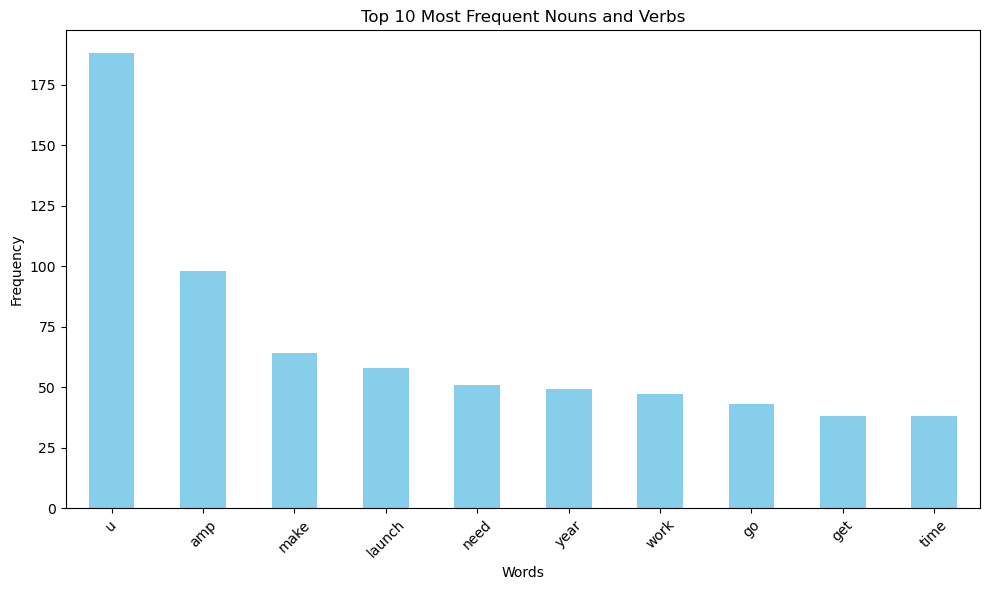

In [46]:
#Plot the top 10 most frequent nouns and verbs
top_nouns_verbs=nouns_verbs_freq.head(10)
plt.figure(figsize=(10,6))
top_nouns_verbs.plot(kind='bar',color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Nouns and Verbs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Sentimental Analysis

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique used to determine the sentiment or emotion expressed in a piece of text. The goal of sentiment analysis is to classify the text as positive, negative, or neutral, based on the underlying sentiment conveyed by the words and phrases used in the text.
Sentiment analysis involves using machine learning and NLP techniques to analyze and categorize the emotional tone or attitude of a given text, such as a review, social media post, customer feedback, or news article.

1. Using NLTK's SentimentIntensityAnalyzer (SIA):

In [48]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Linta
[nltk_data]     Stephen\AppData\Roaming\nltk_data...


True

In [49]:
from nltk.sentiment import SentimentIntensityAnalyzer

#Initialize SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

#Function to get sentiment using SIA
def get_sentiment_sia(text):
    sentiment_scores=sia.polarity_scores(text)
    sentiment="Positive" if sentiment_scores['compound'] > 0 else "Neutral" if sentiment_scores['compound']==0 else "Negative"
    return sentiment

#Apply SIA sentiment analysis on 'Preprocessed_Tweets' column
ElonMusk['SIA_Sentiment']=ElonMusk['Preprocessed_Tweets'].apply(get_sentiment_sia)
ElonMusk[['Preprocessed_Tweets','SIA_Sentiment']].head()

,Preprocessed_Tweets,SIA_Sentiment
0,kunalb 11 I alien,Neutral
1,ID_AA_Carmack Ray tracing Cyberpunk HDR next l...,Neutral
2,joerogan Spotify Great interview,Positive
3,gtera 27 Doge underestimated,Negative
4,teslacn Congratulations Tesla China amazing ex...,Positive


In [51]:
#Count the occurrences of each sentiment category
sentiment_counts=ElonMusk['SIA_Sentiment'].value_counts()

#Print the sentiment counts
print("Sentiment Counts using SIA:")
print(sentiment_counts)
print()

Sentiment Counts using SIA:
Positive    906
Neutral     882
Negative    211
Name: SIA_Sentiment, dtype: int64



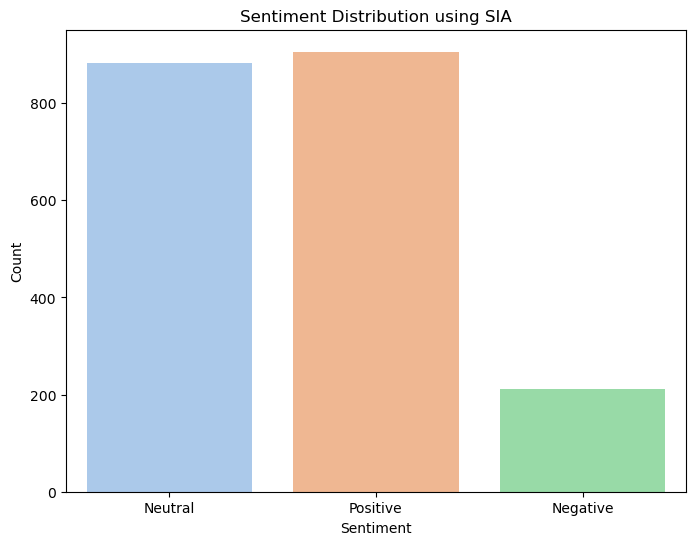

In [52]:
# Create a count plot using Seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='SIA_Sentiment',data=ElonMusk,palette='pastel')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution using SIA')
plt.show()

2. Using TextBlob:

In [53]:
from textblob import TextBlob

#Function to get sentiment using TextBlob
def get_sentiment_textblob(text):
    analysis=TextBlob(text)
    sentiment="Positive" if analysis.sentiment.polarity > 0 else "Neutral" if analysis.sentiment.polarity == 0 else "Negative"
    return sentiment

# Apply TextBlob sentiment analysis on 'Preprocessed_Tweets' column
ElonMusk['TextBlob_Sentiment']=ElonMusk['Preprocessed_Tweets'].apply(get_sentiment_textblob)
ElonMusk[['Preprocessed_Tweets','TextBlob_Sentiment']].head()

,Preprocessed_Tweets,TextBlob_Sentiment
0,kunalb 11 I alien,Negative
1,ID_AA_Carmack Ray tracing Cyberpunk HDR next l...,Neutral
2,joerogan Spotify Great interview,Positive
3,gtera 27 Doge underestimated,Neutral
4,teslacn Congratulations Tesla China amazing ex...,Positive


In [54]:
# Count the occurrences of each sentiment category using TextBlob
sentiment_counts_textblob=ElonMusk['TextBlob_Sentiment'].value_counts()

# Print the sentiment counts using TextBlob
print("Sentiment Counts using TextBlob:")
print(sentiment_counts_textblob)

Sentiment Counts using TextBlob:
Neutral     932
Positive    864
Negative    203
Name: TextBlob_Sentiment, dtype: int64


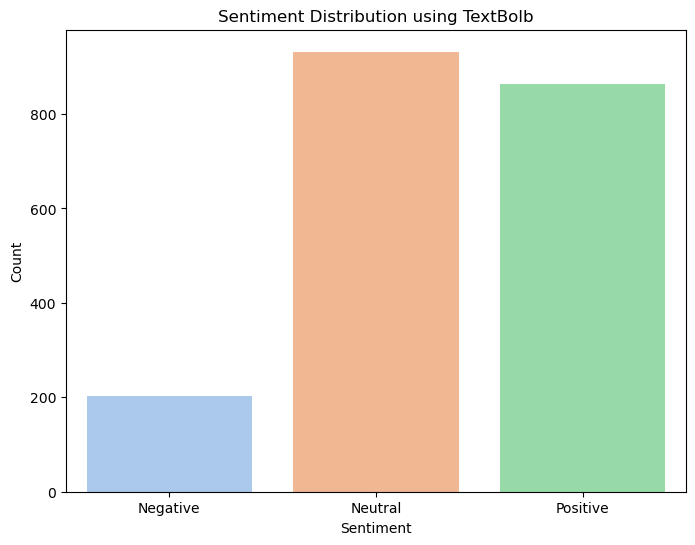

In [55]:
# Create a count plot using Seaborn
plt.figure(figsize=(8,6))
sns.countplot(x='TextBlob_Sentiment',data=ElonMusk,palette='pastel')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution using TextBolb')
plt.show()

###### Model Building

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

#Split the dataset into features (X) and target (y)
X=ElonMusk['Preprocessed_Tweets']
y=ElonMusk['SIA_Sentiment']  

#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Initialize TF-IDF Vectorizer
vectorizer=TfidfVectorizer(max_features=5000)

#Transform the training data
X_train_tfidf=vectorizer.fit_transform(X_train)

#Initialize a classification model (e.g., Naive Bayes)
model=MultinomialNB()

#Train the model
model.fit(X_train_tfidf,y_train)

#Transform the testing data
X_test_tfidf=vectorizer.transform(X_test)

In [57]:
# Predict sentiments on the testing data
y_pred = model.predict(X_test_tfidf)
y_pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive',
       '

In [58]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[  0  12  24]
 [  0 114  65]
 [  0  24 161]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        36
     Neutral       0.76      0.64      0.69       179
    Positive       0.64      0.87      0.74       185

    accuracy                           0.69       400
   macro avg       0.47      0.50      0.48       400
weighted avg       0.64      0.69      0.65       400

